Calculate the statistics of the area of solar panels in meters 

**2.a** What method was used to compute the area (in meters) for a single instance?


# **Procedure for Calculating Solar Panel Area from Labels**

## **1. Understanding the Label Format**
Each label file contains multiple bounding boxes, where each line follows this format:


- **category**: The class label of the object.
- **x_center, y_center**: The normalized center coordinates of the bounding box (values between 0 and 1).
- **width, height**: The normalized width and height of the bounding box (values between 0 and 1).

## **2. Given Parameters**
For Tile 1, we have the following geotransform parameters:
- **Pixel Size**:
  -$$ \ x_{\text{pixel size}} = 0.31 \ meters/pixel$$
  - $$\ y_{\text{pixel size}} = -0.31 \ meters/pixel$$
- **Chip Size**:
  - $$\ \text{chip\_size} = 416 \ pixels$$

## **3. Formula for Calculating Area**
To compute the area of a bounding box:

1. Convert **normalized width and height** to pixels:

   $$
   \text{width}_{px} = \text{width}_{norm} \times \text{chip\_size}
   $$

   $$
   \text{height}_{px} = \text{height}_{norm} \times \text{chip\_size}
   $$

2. Convert pixels to meters:

   $$
   \text{width}_{m} = \text{width}_{px} \times x_{\text{pixel size}}
   $$

   $$
   \text{height}_{m} = \text{height}_{px} \times |y_{\text{pixel size}}|
   $$

3. Compute the **area in square meters**:

   $$
   \text{area} = \text{width}_{m} \times \text{height}_{m}
   $$




**2.b**What is the mean area and standard deviation?

In [8]:
import os
import numpy as np

# Geotransform parameters for Tile 1 (from README)
x_pixel_size = 0.31  # meters/pixel
y_pixel_size = -0.31  # meters/pixel (negative because of coordinate system)
chip_size = 416  # Native resolution chip size

# Path to the labels_native folder
label_dir = r"E:\AISG Assignment 1\extracted_data\labels\labels_native"

# Function to compute area in meters
def compute_area(width_norm, height_norm):
    width_px = width_norm * chip_size
    height_px = height_norm * chip_size
    width_m = width_px * x_pixel_size
    height_m = height_px * abs(y_pixel_size)
    return width_m * height_m

# Read all labels and compute areas
areas = []
for filename in os.listdir(label_dir):
    if filename.endswith(".txt"):  # Process only text files
        file_path = os.path.join(label_dir, filename)
        with open(file_path, "r") as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) == 5:
                    _, _, _, width_norm, height_norm = map(float, parts)
                    area = compute_area(width_norm, height_norm)
                    areas.append(area)

# Convert to numpy array for statistics
areas = np.array(areas)

# Calculate statistics
mean_area = np.mean(areas)
std_area = np.std(areas)
min_area = np.min(areas)
max_area = np.max(areas)

# Print results
print(f"Total solar panels processed: {len(areas)}")
print(f"Mean Area: {mean_area:.2f} square meters")
print(f"Standard Deviation: {std_area:.2f} square meters")
print(f"Min Area: {min_area:.2f} square meters")
print(f"Max Area: {max_area:.2f} square meters")


Total solar panels processed: 29625
Mean Area: 191.52 square meters
Standard Deviation: 630.70 square meters
Min Area: 1.06 square meters
Max Area: 12177.41 square meters


In [9]:
import os
import numpy as np

# Geotransform parameters for Tile 1 (from README)
x_pixel_size = 0.31  # meters/pixel
y_pixel_size = -0.31  # meters/pixel (negative because of coordinate system)
chip_size = 416  # Native resolution chip size

# Path to the labels_native folder
label_dir = r"E:\AISG Assignment 1\extracted_data\labels\labels_native"

# Function to compute area in meters
def compute_area(width_norm, height_norm):
    width_px = width_norm * chip_size
    height_px = height_norm * chip_size
    width_m = width_px * x_pixel_size
    height_m = height_px * abs(y_pixel_size)
    return width_m * height_m

# Variables to track min and max area
min_area = float('inf')
max_area = float('-inf')
min_instance = None
max_instance = None

# Read all labels and compute areas
for filename in os.listdir(label_dir):
    if filename.endswith(".txt"):  # Process only text files
        file_path = os.path.join(label_dir, filename)
        with open(file_path, "r") as f:
            for line_number, line in enumerate(f, start=1):
                parts = line.strip().split()
                if len(parts) == 5:
                    _, _, _, width_norm, height_norm = map(float, parts)
                    area = compute_area(width_norm, height_norm)
                    
                    # Check for min and max area
                    if area < min_area:
                        min_area = area
                        min_instance = (filename, line_number, area)
                    if area > max_area:
                        max_area = area
                        max_instance = (filename, line_number, area)

# Print results
print(f"Minimum Area: {min_area:.2f} square meters found in {min_instance[0]} at line {min_instance[1]}")
print(f"Maximum Area: {max_area:.2f} square meters found in {max_instance[0]} at line {max_instance[1]}")


Minimum Area: 1.06 square meters found in solarpanels_native_1__x0_8344_y0_8586_dxdy_416.txt at line 14
Maximum Area: 12177.41 square meters found in solarpanels_native_3__x0_10942_y0_9325_dxdy_416.txt at line 8


**2.c**Plot the histogram of areas. What do you observe?

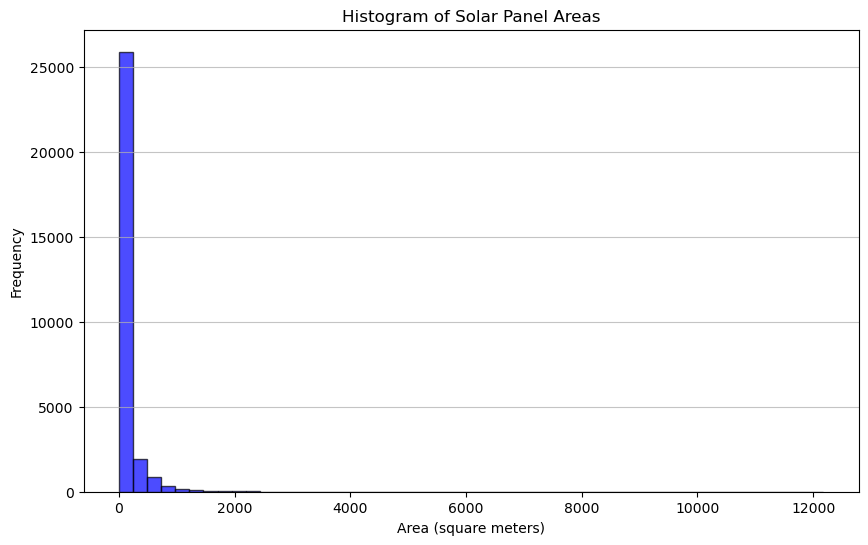

In [10]:
# Plot histogram of areas
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(areas, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel("Area (square meters)")
plt.ylabel("Frequency")
plt.title("Histogram of Solar Panel Areas")
plt.grid(axis='y', alpha=0.75)
plt.show()

# Observations from the Histogram of Solar Panel Areas

## 1. Highly Skewed Distribution  
- The distribution is **right-skewed** (long tail on the right), meaning that most solar panels have **small areas**, while a few have significantly larger areas.

## 2. Majority of Areas are Small  
- The highest frequency of solar panels lies in the **low area range** (close to 0), indicating that **most panels are small in size**.  
- There are very few instances of large solar panels.

## 3. Outliers in the Distribution  
- Some solar panels have exceptionally large areas (beyond **6000+ square meters**), suggesting **potential anomalies** or large-scale installations.

## 4. Log Scale May Help  
- Since the data is **heavily concentrated in smaller values**, a **logarithmic scale on the x-axis** might help in better visualizing the distribution.
